# Sound effects

#### Made By Yuliia Hetman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

### Flager effect

In [2]:
def flager(audio, fs):
    length = len(audio)
    sample = np.array(range(length))
    lfo_freq = 0.5 # in Hz
    lfo_amp = 0.008 # sec
    lfo = 2 + signal.sawtooth(2 * np.pi * lfo_freq * (sample) / fs, 0.5)
    plt.plot(lfo)
    plt.xlabel('Sample index')
    plt.ylabel('Delay amount')
    index = np.around(sample - fs * lfo_amp * lfo)
    index[index < 0] = 0
    index[index > (length - 1)] = length - 1
    audio_with_effect = np.zeros(length)
    for i in range(length):
        audio_with_effect[i] = np.float64(audio[i]) + np.float64(audio[int(index[i])])
    return audio_with_effect

(281856, 2)


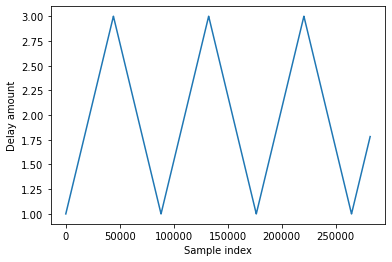

In [3]:
filepath = './sample-6s.wav'
audio, fs = sf.read(filepath)
print(audio.shape)
audio = [i[0] for i in audio]
flager_audio = flager(audio, fs)
sf.write('flager_audio.wav', flager_audio, fs)

### Echo effect

In [4]:
def echo(audio,delay, fs):
    filt = np.zeros(int(delay * fs + 1))
    filt[0] = 1
    filt[int(delay * fs)] = 0.7
    audio_with_effect = np.convolve(audio, filt, 'same')
    return audio_with_effect

In [5]:
filepath = './sample-3s.wav'
audio, fs = sf.read(filepath)
print(audio.shape)
audio = [i[0] for i in audio]
echo_audio = echo(audio, 1, fs)
sf.write('echo_audio.wav', echo_audio, fs)

(140928, 2)
